In [1]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
%matplotlib inline
# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
# NLTK Stop words (insert the stop words you prefer or you can use the list uploaded under the file name: function-ar)

mylist= [...]

from nltk.corpus import stopwords
stop_words = mylist

In [3]:
df = pd.read_csv(r'C:\\Users\\snmuj\\Documents\\TopicModelling_Man-Woman\\LDATopicModelling-main\\W_N.csv')
df = df.head(4786)
df.dropna()
print(df.Score.unique())
df.head()

[1]


,Id,Score,Text
0,1,1,النساء والأطفال أول ضحايا الأزمة الاقتصادية في...
1,2,1,إقبال كبير على أول انتخابات بلدية في قطر الدوح...
2,3,1,توظيف المواطنين وحيّا سموه المرأة السعودية
3,4,1,على سؤال لالجزيرة حول مساهمة المرأة المرأة منا...
4,5,1,إعلان الأمم المتحدة عام عاما لغرس بذور السلام ...


In [4]:
# Convert to list
data = df.Text.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

['النساء والأطفال أول ضحايا الأزمة الاقتصادية في آسيا مانيلا أ ف ب اعلنت ان '
 'النساء والاطفال في آسيا هم الذين النساء اكثر مما اساء الى الرجال فالنساء '
 'المرأة في منطقة حيث تدفع لملايين النساء البلدان فإن الارقام تثبت ان وضع '
 'النساء الفلبين ارتفعت البطالة بين النساء بنسبة المدن والارياف تدنت عائدات '
 'النساء اكثر من النساء قليلة بين المهاجرين في م فانهن نسبة النساء بين العمال '
 'المهاجرين من']


In [5]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=False))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['النساء', 'والأطفال', 'أول', 'ضحايا', 'الأزمة', 'الاقتصادية', 'في', 'آسيا', 'مانيلا', 'اعلنت', 'ان', 'النساء', 'والاطفال', 'في', 'آسيا', 'هم', 'الذين', 'النساء', 'اكثر', 'مما', 'اساء', 'الى', 'الرجال', 'فالنساء', 'المرأة', 'في', 'منطقة', 'حيث', 'تدفع', 'لملايين', 'النساء', 'البلدان', 'فإن', 'الارقام', 'تثبت', 'ان', 'وضع', 'النساء', 'الفلبين', 'ارتفعت', 'البطالة', 'بين', 'النساء', 'بنسبة', 'المدن', 'والارياف', 'تدنت', 'عائدات', 'النساء', 'اكثر', 'من', 'النساء', 'قليلة', 'بين', 'المهاجرين', 'في', 'فانهن', 'نسبة', 'النساء', 'بين', 'العمال', 'المهاجرين', 'من']]


In [6]:

# Build the bigram and trigram models
# bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
# trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
# bigram_mod = gensim.models.phrases.Phraser(bigram)
# trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
# print(trigram_mod[bigram_mod[data_words[0]]])

In [7]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in mylist] for doc in texts]

#def make_bigrams(texts):
   # return [bigram_mod[doc] for doc in texts]

#def make_trigrams(texts):
 #   return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [8]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
#data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en

nlp = spacy.load('xx_ent_wiki_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
#data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

#print(data_lemmatized[:1])
print(data_words_nostops[:1])

[['والأطفال', 'ضحايا', 'الأزمة', 'الاقتصادية', 'آسيا', 'مانيلا', 'اعلنت', 'والاطفال', 'آسيا', 'اكثر', 'اساء', 'فالنساء', 'منطقة', 'تدفع', 'لملايين', 'البلدان', 'الارقام', 'تثبت', 'وضع', 'الفلبين', 'ارتفعت', 'البطالة', 'بنسبة', 'المدن', 'والارياف', 'تدنت', 'عائدات', 'اكثر', 'قليلة', 'المهاجرين', 'فانهن', 'نسبة', 'العمال', 'المهاجرين']]


C:\Users\snmuj\anaconda3\lib\site-packages\spacy\util.py:275: UserWarning: [W031] Model 'xx_ent_wiki_sm' (2.2.0) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.5). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [9]:
# Create Dictionary
id2word = corpora.Dictionary(data_words_nostops)

# Create Corpus
texts = data_words_nostops

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 2), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1)]]


In [10]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:4]]

[[('آسيا', 2),
  ('ارتفعت', 1),
  ('اساء', 1),
  ('اعلنت', 1),
  ('اكثر', 2),
  ('الأزمة', 1),
  ('الارقام', 1),
  ('الاقتصادية', 1),
  ('البطالة', 1),
  ('البلدان', 1),
  ('العمال', 1),
  ('الفلبين', 1),
  ('المدن', 1),
  ('المهاجرين', 2),
  ('بنسبة', 1),
  ('تثبت', 1),
  ('تدفع', 1),
  ('تدنت', 1),
  ('ضحايا', 1),
  ('عائدات', 1),
  ('فالنساء', 1),
  ('فانهن', 1),
  ('قليلة', 1),
  ('لملايين', 1),
  ('مانيلا', 1),
  ('منطقة', 1),
  ('نسبة', 1),
  ('والأطفال', 1),
  ('والارياف', 1),
  ('والاطفال', 1),
  ('وضع', 1)],
 [('أدلوا', 1),
  ('إقبال', 1),
  ('ابوابها', 1),
  ('الاقتراع', 1),
  ('الانتخاب', 3),
  ('البلدي', 1),
  ('الدوحة', 1),
  ('الساعة', 1),
  ('السباق', 1),
  ('القطريون', 1),
  ('المائة', 1),
  ('المالكي', 1),
  ('المجلس', 1),
  ('المركزي', 1),
  ('الناخبين', 1),
  ('انتخابات', 2),
  ('بأصواتهم', 1),
  ('بحلول', 1),
  ('بلدية', 1),
  ('تاريخية', 1),
  ('ترشيح', 1),
  ('تمارس', 1),
  ('توافدوا', 1),
  ('توجه', 1),
  ('حق', 1),
  ('شهود', 1),
  ('ظهرا', 1),
  ('عيان', 1),
  

In [11]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=50,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.1,
                                           eta=0.01,
                                           per_word_topics=True)

In [12]:
# Print the Keyword in the 10 topics
print(lda_model.print_topics())
#print("$")
doc_lda = lda_model[corpus]

[(0, '0.060*"مجال" + 0.048*"جدة" + 0.044*"اللجنة" + 0.041*"قضايا" + 0.040*"الأولى" + 0.033*"مؤخرا" + 0.028*"الجديد" + 0.026*"نساء" + 0.026*"كلية" + 0.025*"العمر"'), (1, '0.261*"العمل" + 0.056*"كبير" + 0.052*"للعمل" + 0.043*"المجلس" + 0.038*"الإسلام" + 0.037*"الزوج" + 0.034*"حق" + 0.034*"الساعة" + 0.034*"موضوع" + 0.029*"المائة"'), (2, '0.307*"عمل" + 0.098*"خاصة" + 0.049*"سن" + 0.048*"نسبة" + 0.045*"المجالات" + 0.032*"الدورة" + 0.027*"نسائية" + 0.023*"تصل" + 0.022*"شراء" + 0.019*"عالم"'), (3, '0.220*"دور" + 0.188*"المجتمع" + 0.068*"وضع" + 0.064*"الأسرة" + 0.054*"زوجها" + 0.039*"تعليم" + 0.037*"دائما" + 0.021*"مهم" + 0.020*"زمن" + 0.017*"فالمرأة"'), (4, '0.106*"والأطفال" + 0.060*"الماضي" + 0.059*"الشرطة" + 0.058*"الخاصة" + 0.050*"منطقة" + 0.044*"الاجتماعية" + 0.038*"التعليم" + 0.036*"قضية" + 0.034*"مدير" + 0.033*"الاقتصادية"'), (5, '0.081*"مدينة" + 0.068*"فعاليات" + 0.064*"بنت" + 0.053*"الحياة" + 0.043*"الأميرة" + 0.043*"حالة" + 0.038*"لعمل" + 0.037*"صاحبة" + 0.031*"جديدة" + 0.026*"بجامعة

In [13]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_nostops, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -96.54333963364742

Coherence Score:  0.4692382199222659


In [14]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word, mds='tsne')
vis

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
0      32.420952   8.115230       1        1  14.004074
4       0.648955  71.707100       2        1  12.560012
5      71.019684   9.971006       3        1  10.945604
6       3.785981  33.185135       4        1   9.942996
2     -42.666500  -9.222070       5        1   9.118299
3      -3.621689 -43.526516       6        1   9.070997
1      -3.632402  -4.171708       7        1   8.744287
9     -36.584400  35.804413       8        1   8.684225
8      44.391380  50.615383       9        1   8.501865
7      40.235809 -31.591665      10        1   8.427640, topic_info=         Term         Freq        Total Category  logprob  loglift
142       عمل  2186.000000  2186.000000  Default  30.0000  30.0000
288     العمل  1782.000000  1782.000000  Default  29.0000  29.0000
188       دور  1556.000000  1556.000000  Default  28.0000  28.0000
128   المجتمع  1333.000000  1333.000000  Default  27.0000  27.0000
187      حقوق   975.000000   975.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
405      مهام    11.786862    12.337645  Topic10  -6.3248   2.4280
8811      فصل     0.069454     0.620236  Topic10 -11.4588   0.2842
8804   الوزير     0.069454     0.620236  Topic10 -11.4588   0.2842
8591    بيضاء     0.069454     0.620236  Topic10 -11.4588   0.2842
8590    بمكتب     0.069454     0.620236  Topic10 -11.4588   0.2842

[341 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
0         2  0.990672   آسيا
821       9  0.997773  أثناء
734       2  0.998991  أصبحت
383      10  0.998833  أهمية
234       8  0.996548   إطار
...     ...       ...    ...
242       8  0.994749  يتعلق
557       8  0.990730    يدل
231       1  0.999491    يرى
898       3  0.985778   يشكل
733       6  0.996837   يعود

[289 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 6, 7, 3, 4, 2, 10, 9, 8])

import os
os.environ.update({'MALLET_HOME':r'C:\\Users\\snmuj\\AppData\\Local\\Temp\\mallet-2.0.8'})
mallet_path = 'C:\\Users\\snmuj\\AppData\\Local\\Temp\\mallet-2.0.8\\bin\\mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=50, id2word=id2word)

In [15]:
import os
from gensim.models.wrappers import LdaMallet
os.environ.update({'MALLET_HOME':r'C:\\mallet\\mallet-2.0.8'})
mallet_path = 'C:\\mallet\\mallet-2.0.8\\bin\\mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=10, id2word=id2word)

result = (ldamallet.show_topics(num_topics=10, num_words=10,formatted=False))
for each in result:
    print (each)

(0, [('العامة', 0.010955019976801135), ('منطقة', 0.009279546333290372), ('تعليم', 0.00902178115736564), ('الشيخ', 0.00799072045366671), ('مجلس', 0.007604072689779611), ('رئيس', 0.006830777162005413), ('وزارة', 0.006444129398118314), ('مجموعة', 0.005413068694419384), ('الآن', 0.005284186106457017), ('كلية', 0.005284186106457017)])
(1, [('نسبة', 0.012256403971074886), ('الحمل', 0.012133839931364137), ('دراسة', 0.012011275891653388), ('اكثر', 0.009192302978306165), ('الدراسة', 0.008089226620909426), ('الثدي', 0.0073538423826449316), ('سن', 0.006373330064958941), ('المائة', 0.005883073906115945), ('حالات', 0.0051476896678514525), ('بسرطان', 0.005025125628140704)])
(2, [('النسائية', 0.01692132845056194), ('المجتمع', 0.012122742770551838), ('مجال', 0.010607399924232857), ('الاجتماعية', 0.009723449930546786), ('مركز', 0.008965778507387296), ('بنت', 0.008965778507387296), ('النسائي', 0.008965778507387296), ('اللجنة', 0.007324157090541735), ('الأميرة', 0.007197878520015154), ('جديدة', 0.0068190

In [16]:
# Show Topics
#print(ldamallet.show_topics(formatted=True))
print(ldamallet.show_topics(10))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_words_nostops, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

# Compute Coherence Score using UMass
#coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_words_nostops, dictionary=id2word, coherence="u_mass")
#coherence_ldamallet = coherence_model_ldamallet.get_coherence()
#print('\nCoherence Score: ', coherence_ldamallet)

[(0, '0.011*"العامة" + 0.009*"منطقة" + 0.009*"تعليم" + 0.008*"الشيخ" + 0.008*"مجلس" + 0.007*"رئيس" + 0.006*"وزارة" + 0.005*"مجموعة" + 0.005*"الآن" + 0.005*"كلية"'), (1, '0.012*"نسبة" + 0.012*"الحمل" + 0.012*"دراسة" + 0.009*"اكثر" + 0.008*"الدراسة" + 0.007*"الثدي" + 0.006*"سن" + 0.006*"المائة" + 0.005*"حالات" + 0.005*"بسرطان"'), (2, '0.017*"النسائية" + 0.012*"المجتمع" + 0.011*"مجال" + 0.010*"الاجتماعية" + 0.009*"مركز" + 0.009*"بنت" + 0.009*"النسائي" + 0.007*"اللجنة" + 0.007*"الأميرة" + 0.007*"جديدة"'), (3, '0.016*"خاصة" + 0.010*"الزواج" + 0.010*"تقوم" + 0.008*"الحياة" + 0.008*"وجود" + 0.007*"سواء" + 0.006*"للمرأة" + 0.006*"الجديد" + 0.005*"السعوديات" + 0.005*"كبير"'), (4, '0.033*"والولادة" + 0.018*"مستشفى" + 0.010*"أمراض" + 0.009*"جدة" + 0.009*"الصحية" + 0.009*"حالة" + 0.007*"عملية" + 0.007*"بمستشفى" + 0.007*"والأطفال" + 0.007*"استشاري"'), (5, '0.009*"العيد" + 0.009*"نساء" + 0.008*"سوق" + 0.007*"والاطفال" + 0.007*"تحقيق" + 0.007*"كبيرة" + 0.006*"شهر" + 0.006*"دخول" + 0.006*"عيد" + 0.005

In [17]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=1, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [18]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_words_nostops, start=2,limit=50, step=6)

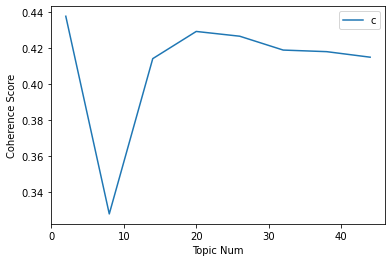

In [19]:
import matplotlib 
#matplotlib.rc('xtick', labelsize=12) 
#matplotlib.rc('ytick', labelsize=12)

#font = {'family' : 'sakkal majalla',
#        'weight' : 'normal',
#        'size'   : 16}

#matplotlib.rc('font', **font)
#from arabic_reshaper import arabic_reshaper
#from bidi.algorithm import get_display
#from matplotlib import pyplot as plt
#def f(x):
#    out=get_display( arabic_reshaper.reshape(x))
#    return(out)
# Show graph
limit=50; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel(("Topic Num"), alpha = 1)
plt.ylabel(("Coherence Score"), alpha = 1)
plt.legend(("coherence_values"), loc='best')
plt.show()

In [20]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.4376
Num Topics = 8  has Coherence Value of 0.3278
Num Topics = 14  has Coherence Value of 0.4141
Num Topics = 20  has Coherence Value of 0.4292
Num Topics = 26  has Coherence Value of 0.4265
Num Topics = 32  has Coherence Value of 0.4188
Num Topics = 38  has Coherence Value of 0.4179
Num Topics = 44  has Coherence Value of 0.4149


In [21]:
# Select the model and print the topics
optimal_model = model_list[5]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

[(10,
  '0.021*"الانتخابات" + 0.013*"البلاد" + 0.012*"الرئيس" + 0.010*"مصلى" + 0.010*"مشروع" + 0.009*"البلدية" + 0.009*"عرض" + 0.009*"تشارك" + 0.008*"تظهر" + 0.007*"لمشاركة"'),
 (18,
  '0.027*"سوق" + 0.013*"ريال" + 0.013*"الدورة" + 0.012*"الأسواق" + 0.011*"النسائي" + 0.011*"السوق" + 0.010*"آخر" + 0.010*"شركة" + 0.010*"عالم" + 0.009*"يعد"'),
 (27,
  '0.036*"حالة" + 0.026*"الشيخ" + 0.013*"تقول" + 0.013*"قيادة" + 0.012*"صالح" + 0.012*"الزواج" + 0.010*"العلماء" + 0.009*"معالي" + 0.009*"نقل" + 0.009*"هيئة"'),
 (21,
  '0.026*"مركز" + 0.025*"بنت" + 0.020*"الأميرة" + 0.015*"معرض" + 0.014*"فعاليات" + 0.013*"النسائي" + 0.012*"صاحبة" + 0.012*"حرم" + 0.011*"الحرمين" + 0.011*"التربية"'),
 (30,
  '0.022*"العديد" + 0.017*"مدينة" + 0.013*"والأطفال" + 0.011*"حضور" + 0.011*"جدا" + 0.011*"الكبير" + 0.011*"الفعاليات" + 0.010*"استخدام" + 0.010*"باريس" + 0.009*"الشعبية"'),
 (16,
  '0.022*"القبض" + 0.018*"رجال" + 0.012*"قامت" + 0.012*"شرطة" + 0.010*"التحقيق" + 0.009*"الأمن" + 0.009*"محافظة" + 0.009*"الأمنية"

In [22]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,20.0,0.3361,"والاطفال, الجمعية, الخيرية, طريق, جمعية, خاص, ...",النساء والأطفال أول ضحايا الأزمة الاقتصادية في...
1,1,7.0,0.0880,"الصحية, مجلس, منطقة, مدير, حائل, صاحب, المجلس,...",إقبال كبير على أول انتخابات بلدية في قطر الدوح...
2,2,7.0,0.0660,"الصحية, مجلس, منطقة, مدير, حائل, صاحب, المجلس,...",توظيف المواطنين وحيّا سموه المرأة السعودية
3,3,12.0,0.0567,"والأطفال, كبيرة, كبير, وضع, شراء, وعدم, الاربع...",على سؤال لالجزيرة حول مساهمة المرأة المرأة منا...
4,4,29.0,0.0931,"النسائية, الاجتماعية, اللجنة, الأعمال, التعليم...",إعلان الأمم المتحدة عام عاما لغرس بذور السلام ...
5,5,19.0,0.0991,"زوجها, الزواج, أمام, دائما, الحياة, الزوج, مجت...",ربما الشرطة تظل المرأة دائما قضية ساخنة في اذه...
6,6,15.0,0.0475,"تعليم, العالم, العربي, الإسلامية, مكتب, شؤون, ...",وحقوق المرأة وانهاء ما وصفه بالاضطهاد
7,7,11.0,0.0692,"للمرأة, جديدة, صورة, مجموعة, السعوديات, الإعلا...",ثقافة المشاركة للرجل جعلت المرأة بعيدة عن مسحا...
8,8,18.0,0.0483,"سوق, ريال, الدورة, الأسواق, النسائي, السوق, آخ...",من ذلك ربة المنزل وتوعية المرأة لمن
9,9,13.0,0.0737,"عمل, العمل, المجال, مجال, الخاصة, للعمل, لعمل,...",النساء القياديات في عام م اجرت كلية العلوم الا...


In [23]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.4054,"والولادة, مستشفى, أمراض, بمستشفى, استشاري, الط...",البروفيسور المشاري يناقش عقم النساء وأمراض الن...
1,1.0,0.3513,"العاملة, نظام, الجديد, الفنانة, حياتها, حاليا,...",شريهان بدلاً من بوسي في رابعة العدوية شريهان ب...
2,2.0,0.3359,"خاصة, نسبة, السن, مجال, صحة, العظام, أكبر, زيا...",الفرنسيات يعزفن عن زيارة طبيب النساء إلا عند ا...
3,3.0,0.4167,"تقوم, كافة, خصوصية, مستوى, عبدالرحمن, وجود, ال...",يخلِّد ما للأميرة نورة يرحمها الله من خصال إنس...
4,4.0,0.3716,"سن, الأمريكية, الحوامل, واشنطن, المتحدة, علاقة...",الكولسترول يزيد خطر تعرض النساء للجلطات الكولس...


In [24]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,20.0,"والاطفال, الجمعية, الخيرية, طريق, جمعية, خاص, ...",247.0,0.0516
1.0,7.0,"الصحية, مجلس, منطقة, مدير, حائل, صاحب, المجلس,...",169.0,0.0353
2.0,7.0,"الصحية, مجلس, منطقة, مدير, حائل, صاحب, المجلس,...",211.0,0.0441
3.0,12.0,"والأطفال, كبيرة, كبير, وضع, شراء, وعدم, الاربع...",142.0,0.0297
4.0,29.0,"النسائية, الاجتماعية, اللجنة, الأعمال, التعليم...",138.0,0.0288
...,...,...,...,...
4781.0,22.0,"العيد, نساء, الطائف, شهر, عيد, الناس, الذهب, ا...",NaN,NaN
4782.0,30.0,"العديد, مدينة, والأطفال, حضور, جدا, الكبير, ال...",NaN,NaN
4783.0,1.0,"العاملة, نظام, الجديد, الفنانة, حياتها, حاليا,...",NaN,NaN
4784.0,9.0,"مساء, الجنادرية, الساعة, الاثنين, أيام, الأطفا...",NaN,NaN
